# Mixed Martial Arts and the UFC


The UFC is the largest MMA promotion company in the world and features some of the highest-level fighters in the sport. As of 2020 the UFC has held over 500 events features fighters in 12 different weight divisions. The data set is a collection of over 5000 fights from the years 1993 to 2019.

Being a huge fan of MMA, I wanted to design some Machine Learning Models to experiment with the avaiable data. The goal is to make a model to predict fight outcomes, and see if it has any usefulness in real world application.

In this particular notebook I reduce the data down to (what I felt was) core stats, so despite this dataset having over 145 features, I reduce it down to height, weight, reach, win streak, lose streak, total wins, total losses, and total draws. In the future I will apply more features to see if the model accuracy improves at all.

In this notebook I use the following algorithms for model building:
* Gaussian Naive Bayes
* Logistic Regression
* Decision Tree
* KNN
* Random Forest
* Support Vector Classifier
* XGBoost
* Artificial Neural Network

The models with the highest accuracy score (Using k-fold cross-validation) on the training data are then accessed on the testing data.

Finally the models that performed well are then applied to the upcoming event (March 6th 2021), to make predictions on fight winners.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Import and clean data for use in models

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_df =  pd.read_csv('data.csv')
data_df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,20-03-2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,20-03-2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,20-03-2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,20-03-2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,20-03-2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,11-03-1994,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,11-03-1994,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,John McCarthy,11-03-1994,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,John McCarthy,11-03-1994,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [7]:
df = data_df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 0 to 5884
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 4.3+ MB


In [9]:
columns=df.select_dtypes(include='object').columns

In [10]:
df.std()

title_bout                0.244803
B_avg_KD                  0.382721
B_avg_opp_KD              0.307015
B_avg_SIG_STR_pct         0.120214
B_avg_opp_SIG_STR_pct     0.121733
                           ...    
R_Height_cms              8.901029
R_Reach_cms              10.697950
R_Weight_lbs             34.258023
B_age                     4.019934
R_age                     4.156208
Length: 135, dtype: float64

In [11]:
df.drop(columns=['R_fighter', 'B_fighter', 'Referee', 'date', 'location','weight_class'], inplace=True)

C:\Users\Somu\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df.select_dtypes(include='object')

,Winner,B_Stance,R_Stance
0,Red,Orthodox,Orthodox
1,Red,Orthodox,Orthodox
4,Blue,Orthodox,Orthodox
5,Blue,Switch,Orthodox
6,Blue,Orthodox,Orthodox
...,...,...,...
5759,Red,Orthodox,Orthodox
5767,Red,Orthodox,Orthodox
5799,Red,Orthodox,Orthodox
5840,Red,Orthodox,Orthodox


In [13]:
map_stance = {'Orthodox': 0, 'Switch': 1, 'Southpaw': 2, 'Open Stance': 3}
df['B_Stance'] = df['B_Stance'].replace(map_stance)
df['R_Stance'] = df['R_Stance'].replace(map_stance)

map_winner = {'Red': 0, 'Blue': 1, 'Draw': 2}
df['Winner'] = df['Winner'].replace(map_winner)

C:\Users\Somu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Somu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Somu\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [14]:
df.drop(columns=df.select_dtypes(include='bool').columns, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 0 to 5884
Columns: 137 entries, Winner to R_age
dtypes: float64(106), int64(31)
memory usage: 4.1 MB


C:\Users\Somu\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df['Winner'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
df = df[df['Winner'] != 2]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3821 entries, 0 to 5884
Columns: 137 entries, Winner to R_age
dtypes: float64(106), int64(31)
memory usage: 4.0 MB


In [18]:
X = df.drop(columns=['Winner'])
Y = df['Winner']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [20]:
print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 2865
Testing size = 956


## Model Training and Evaluation on Data using k-fold cross validation

In [21]:
seed = 404
np.random.seed(seed)

In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(gnb, X_train, y_train.values.ravel(), cv=kfold)
gnb_score = cv_score.mean()
print('Gaussian Naive Bayes K-fold Scores:')
print(cv_score)
print()
print('Gaussian Naive Bayes Average Score:')
print(gnb_score)
print()

Gaussian Naive Bayes K-fold Scores:
[0.61567164 0.64925373 0.54850746 0.60820896 0.5917603  0.55430712
 0.58052434 0.5505618  0.58426966 0.58801498]

Gaussian Naive Bayes Average Score:
0.5871079993291967



In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 10000)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(lr, X_train, y_train.values.ravel(), cv=kfold)
lr_score = cv_score.mean()
print('Logistic Regression K-fold Scores (training):')
print(cv_score)
print()
print('Logistic Regression Average Score:')
print(lr_score)

Logistic Regression K-fold Scores (training):
[0.62020906 0.66202091 0.66550523 0.65505226 0.66202091 0.64335664
 0.65034965 0.63986014 0.60839161 0.61888112]

Logistic Regression Average Score:
0.64256475232085


In [24]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(dt, X_train, y_train.values.ravel(), cv=kfold)
dt_score = cv_score.mean()
print('Decision Tree K-fold Scores:')
print(cv_score)
print()
print('Decision Tree Average Score:')
print(dt_score)

Decision Tree K-fold Scores:
[0.57839721 0.5087108  0.58188153 0.57839721 0.57839721 0.59090909
 0.52447552 0.6013986  0.55594406 0.57692308]

Decision Tree Average Score:
0.5675434321775785


In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv_score = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10)
knn_score = cv_score.mean()
print('KNN K-fold Scores):')
print(cv_score)
print()
print('KNN Average Score:')
print(knn_score)

KNN K-fold Scores):
[0.61567164 0.58955224 0.6119403  0.58208955 0.58801498 0.59550562
 0.59550562 0.57303371 0.60299625 0.5917603 ]

KNN Average Score:
0.5946070210744033


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(rf, X_train, y_train.values.ravel(), cv=kfold)
rf_score = cv_score.mean()
print('Random Forest K-fold Scores:')
print(cv_score)
print()
print('Random Forest Average Score:')
print(rf_score)

Random Forest K-fold Scores:
[0.64111498 0.61324042 0.67595819 0.6271777  0.6097561  0.65034965
 0.63286713 0.61538462 0.58741259 0.65034965]

Random Forest Average Score:
0.6303611023123218


In [27]:
from sklearn.svm import SVC

svc = SVC(probability = True)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(svc, X_train, y_train.values.ravel(), cv=kfold)
svc_score = cv_score.mean()
print('Support Vector Classification K-fold Scores:')
print(cv_score)
print()
print('Support Vector Classification Average Score:')
print(svc_score)

Support Vector Classification K-fold Scores:
[0.62369338 0.62020906 0.62020906 0.62020906 0.62020906 0.62237762
 0.62237762 0.62237762 0.62237762 0.62237762]

Support Vector Classification Average Score:
0.6216417728612851


## Best performing models

With the training accuracy in mind, we will grab the top 3 models and evaluate them on the testing set

In [32]:
scores = [['Gaussian Naive Bayes', gnb_score],
 ['Logistic Regression', lr_score],
 ['Random Forest', rf_score],
 ['Decision Tree', dt_score],
 ['K-Nearest Neighbor', knn_score],
 ['Support Vector Classifier', svc_score]]

df_scores = pd.DataFrame(scores,
                         columns = ['Model', 'Score Average']
                        )
df_scores

,Model,Score Average
0,Gaussian Naive Bayes,0.577285
1,Logistic Regression,0.642565
2,Random Forest,0.630361
3,Decision Tree,0.567543
4,K-Nearest Neighbor,0.588117
5,Support Vector Classifier,0.621642


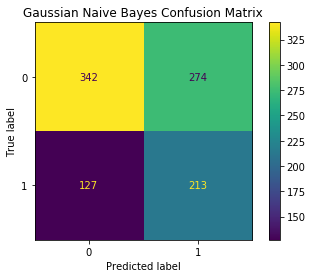

Gaussian Naive Bayes Model Accuracy (on testing set): 
0.5805439330543933


In [33]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

GNB = GaussianNB()
GNB_model = GNB.fit(X_train, y_train.values.ravel())
y_pred = GNB_model.predict(X_test)

disp = plot_confusion_matrix(GNB_model, X_test, y_test)
disp.ax_.set_title('Gaussian Naive Bayes Confusion Matrix')

plt.show()
print('Gaussian Naive Bayes Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

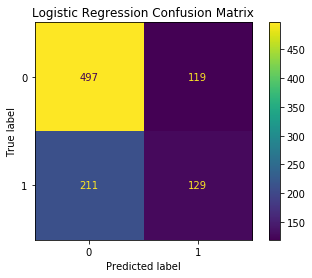

Logistic Regression Model Accuracy (on testing set): 
0.6548117154811716


In [34]:
lr = LogisticRegression(max_iter = 10000)
lr_model = lr.fit(X_train, y_train.values.ravel())
y_pred = lr_model.predict(X_test)

disp = plot_confusion_matrix(lr_model, X_test, y_test)
disp.ax_.set_title('Logistic Regression Confusion Matrix')

plt.show()
print('Logistic Regression Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

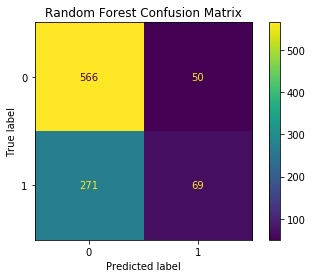

Random Forest Model Accuracy (on testing set): 
0.6642259414225942


In [35]:
rf = RandomForestClassifier(random_state = 1)
rf_model = rf.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)
disp = plot_confusion_matrix(rf_model, X_test, y_test)
disp.ax_.set_title('Random Forest Confusion Matrix')

plt.show()

print('Random Forest Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

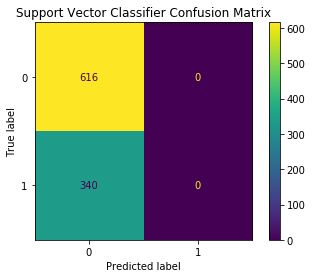

SVC Model Accuracy (on testing set): 
0.6443514644351465


In [36]:
svc = SVC(probability = True)
svc_model = svc.fit(X_train, y_train.values.ravel())
y_pred = svc_model.predict(X_test)
disp = plot_confusion_matrix(svc_model, X_test, y_test)
disp.ax_.set_title('Support Vector Classifier Confusion Matrix')

plt.show()

print('SVC Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

# Prediction Time

# UFC 259: Blachowicz vs Adesanya

### Title fights (5 rounds):
Jan Blachowicz vs Israel Adesanya

Amanda Nunes vs Megan Anderson

Petr Yan vs Aljamain Sterling

### 3 round fights:
Islam Makhachev vs Drew Dober

Thiago Santos vs Aleksandar Rakic


## The Stats: ([https://www.espn.co.uk/mma/fightcenter/_/id/600001860/league/ufc](http://))
### Fight 1
#### Jan Blachowicz (Blue):
* Current Lose Streak: 0
* Current Win Streak: 4
* Draws: 0
* Losses: 8
* Wins: 27
* Stance: Orthodox
* Height: 188
* Reach: 198
* Weight: 205

#### Israel Adesanya (Red):
* Current Lose Streak: 0
* Current Win Streak: 20
* Draws: 0
* Losses: 0
* Wins: 20
* Stance: Switch
* Height: 193
* Reach: 203
* Weight: 193 (speculation based on interview, weigh-ins to come)


### Fight 2
#### Amanda Nunes (Blue):
* Current Lose Streak: 0
* Current Win Streak: 11
* Draws: 0
* Losses: 4
* Wins: 20
* Stance: Orthodox
* Height: 173
* Reach: 165
* Weight: 145

#### Megan Anderson (Red):
* Current Lose Streak: 0
* Current Win Streak: 2
* Draws: 0
* Losses: 4
* Wins: 11
* Stance: Orthodox
* Height: 183
* Reach: 183
* Weight: 145

### Fight 3
#### Petr Yan (Blue):
* Current Lose Streak: 0
* Current Win Streak: 10
* Draws: 0
* Losses: 1
* Wins: 15
* Stance: Switch
* Height: 170
* Reach: 170
* Weight: 135

#### Aljamain Sterling (Red):
* Current Lose Streak: 0
* Current Win Streak: 5
* Draws: 0
* Losses: 3
* Wins: 19
* Stance: Orthodox
* Height: 170
* Reach: 180
* Weight: 135

### Fight 4
#### Islam Makhachev (Blue):
* Current Lose Streak: 0
* Current Win Streak: 6
* Draws: 0
* Losses: 1
* Wins: 18
* Stance: Orthodox
* Height: 178
* Reach: 178
* Weight: 155

#### Drew Dober (Red):
* Current Lose Streak: 0
* Current Win Streak: 3
* Draws: 0
* Losses: 9
* Wins: 23
* Stance: Southpaw
* Height: 173
* Reach: 178
* Weight: 155

### Fight 5
#### Thiago Santos (Blue):
* Current Lose Streak: 2
* Current Win Streak: 0
* Draws: 0
* Losses: 8
* Wins: 21
* Stance: Orthodox
* Height: 188
* Reach: 193
* Weight: 205

#### Aleksandar Rakic (Red):
* Current Lose Streak: 0
* Current Win Streak: 1
* Draws: 0
* Losses: 2
* Wins: 13
* Stance: Orthodox
* Height: 193
* Reach: 198
* Weight: 205

With all the stats available to us, it can create a data frame to feed into our models and get predictions

In [37]:
columns = X.columns

In [38]:
fight1 = [5, 0, 4, 0, 8, 27, 0, 188, 198, 205, 0, 20, 0, 0, 20, 1, 193, 293, 193]
fight2 = [5, 0, 11, 0, 4, 20, 0, 173, 165, 145, 0, 2, 0, 4, 11, 0, 183, 183, 145]
fight3 = [5, 0, 10, 0, 1, 15, 1, 170, 170, 135, 0, 5, 0, 3, 19, 0, 170, 180, 135]
fight4 = [3, 0, 6, 0, 1, 18, 0, 178, 178, 155, 0, 3, 0, 9, 23, 2, 173, 178, 155]
fight5 = [3, 2, 0, 0, 8, 21, 0, 188, 193, 205, 0, 1, 0, 2, 13, 0, 193, 198, 205]

df1 = pd.DataFrame(np.array([fight1, fight2, fight3, fight4, fight5]), columns = columns)

ValueError: Shape of passed values is (5, 19), indices imply (5, 136)

# Model Predictions: (0 indicates Red Fighter Wins, 1 indicates Blue Fighter Wins)

## Support Vector Classifier:

In [40]:
svc_model.predict(df)

ValueError: X.shape[1] = 137 should be equal to 136, the number of features at training time

### Predicted Winners:
* Fight 1 - Israel Adesanya
* Fight 2 - Megan Anderson
* Fight 3 - Aljamain Sterling
* Fight 4 - Drew Dober
* Fight 5 - Aleksandar Rakic

## Random Forest:

In [ ]:
rf_model.predict(df1)

### Predicted Winners:
* Fight 1 - Israel Adesanya
* Fight 2 - Megan Anderson
* Fight 3 - Aljamain Sterling
* Fight 4 - Islam Makhachev
* Fight 5 - Aleksandar Rakic

## Logistic Regression:

In [ ]:
lr_model.predict(df1)

### Predicted Winners:
* Fight 1 - Israel Adesanya
* Fight 2 - Megan Anderson
* Fight 3 - Aljamain Sterling
* Fight 4 - Drew Dober
* Fight 5 - Aleksandar Rakic

# Full Feature Modeling
We'll reduce the problem to a binary classification problem, especially with the new scoring system draws don't occur in the UFC anymore.

In [41]:
df['Winner'].value_counts()

0    2397
1    1424
Name: Winner, dtype: int64

In [42]:
df = df[df['Winner'] != 'Draw']

C:\Users\Somu\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [46]:
print(df.columns.tolist())

['Winner', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_opp_GROUND_att', 'B_avg_opp_G

In [68]:
df['B_Stance']=df['B_Stance'].astype('object')

In [67]:
df['R_Stance']=df['R_Stance'].astype('object')

In [66]:
df['R_Stance'].dtypes

dtype('int64')

In [ ]:
df = df.drop(columns=['B_draw', 'R_draw'])

In [69]:
mapping = {'Orthodox': 0, 'Switch': 1, 'Southpaw': 2, 'Open Stance': 3}
df['B_Stance'] = df['B_Stance'].replace(mapping)
df['R_Stance'] = df['R_Stance'].replace(mapping)

In [73]:
df.Winner=df.Winner.astype('object')

In [74]:
X = df.drop(columns=['Winner'])
Y = df['Winner']
mapping = {'Red': 0, 'Blue': 1}
Y = Y.replace(mapping)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [76]:
seed = 404
np.random.seed(seed)

In [77]:
gnb = GaussianNB()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(gnb, X_train, y_train.values.ravel(), cv=kfold)
print('Gaussian Naive Bayes K-fold Scores:')
print(cv_score)
print()
print('Gaussian Naive Bayes Average Score:')
print(cv_score.mean())
print()

Gaussian Naive Bayes K-fold Scores:
[0.61567164 0.64925373 0.54850746 0.60820896 0.5917603  0.55430712
 0.58052434 0.5505618  0.58426966 0.58801498]

Gaussian Naive Bayes Average Score:
0.5871079993291967



In [78]:
lr = LogisticRegression(max_iter = 10000)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(lr, X_train, y_train.values.ravel(), cv=kfold)
print('Logistic Regression K-fold Scores (training):')
print(cv_score)
print()
print('Logistic Regression Average Score:')
print(cv_score.mean())

Logistic Regression K-fold Scores (training):
[0.64925373 0.69029851 0.64179104 0.61940299 0.64419476 0.66666667
 0.58801498 0.68164794 0.66666667 0.6329588 ]

Logistic Regression Average Score:
0.6480896081390799


In [79]:
dt = tree.DecisionTreeClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(dt, X_train, y_train.values.ravel(), cv=kfold)
print('Decision Tree K-fold Scores:')
print(cv_score)
print()
print('Decision Tree Average Score:')
print(cv_score.mean())

Decision Tree K-fold Scores:
[0.55223881 0.56716418 0.5261194  0.54850746 0.54681648 0.55805243
 0.54681648 0.48314607 0.60299625 0.57303371]

Decision Tree Average Score:
0.5504891273967243


In [80]:
knn = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(knn, X_train, y_train.values.ravel(), cv=kfold)
print('KNN K-fold Scores):')
print(cv_score)
print()
print('KNN Average Score:')
print(cv_score.mean())

KNN K-fold Scores):
[0.6119403  0.58955224 0.54477612 0.6119403  0.60674157 0.60299625
 0.62921348 0.56554307 0.56928839 0.59550562]

KNN Average Score:
0.5927497344736989


In [81]:
rf = RandomForestClassifier(random_state = 1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(rf, X_train, y_train.values.ravel(), cv=kfold)
print('Random Forest K-fold Scores:')
print(cv_score)
print()
print('Random Forest Average Score:')
print(cv_score.mean())

Random Forest K-fold Scores:
[0.6641791  0.63059701 0.63059701 0.6380597  0.61423221 0.64794007
 0.65543071 0.62921348 0.61797753 0.63670412]

Random Forest Average Score:
0.6364930963161719


In [82]:
svc = SVC(probability = True)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(svc, X_train, y_train.values.ravel(), cv=kfold)
print('Support Vector Classification K-fold Scores:')
print(cv_score)
print()
print('Support Vector Classification Average Score:')
print(cv_score.mean())

Support Vector Classification K-fold Scores:
[0.61940299 0.61940299 0.61940299 0.61940299 0.62172285 0.62172285
 0.62172285 0.62172285 0.62172285 0.61797753]

Support Vector Classification Average Score:
0.6204203700598134


C:\Users\Somu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


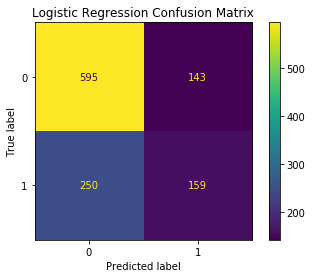

Logistic Regression Model Accuracy (on testing set): 
0.6573670444638187


In [84]:
lr = LogisticRegression(max_iter = 2000)
lr_model = lr.fit(X_train, y_train.values.ravel())
y_pred = lr_model.predict(X_test)

disp = plot_confusion_matrix(lr_model, X_test, y_test)
disp.ax_.set_title('Logistic Regression Confusion Matrix')

plt.show()
print('Logistic Regression Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

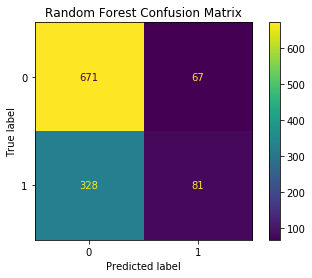

Random Forest Model Accuracy (on testing set): 
0.6556233653007847


In [85]:
rf = RandomForestClassifier(random_state = 1)
rf_model = rf.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)
disp = plot_confusion_matrix(rf_model, X_test, y_test)
disp.ax_.set_title('Random Forest Confusion Matrix')

plt.show()

print('Random Forest Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

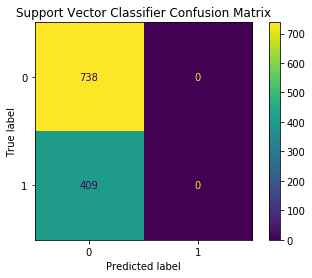

SVC Model Accuracy (on testing set): 
0.6434176111595467


In [86]:
svc = SVC(probability = True)
svc_model = svc.fit(X_train, y_train.values.ravel())
y_pred = svc_model.predict(X_test)
disp = plot_confusion_matrix(svc_model, X_test, y_test)
disp.ax_.set_title('Support Vector Classifier Confusion Matrix')

plt.show()

print('SVC Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

# Final Thoughts

If we look at the current under/over odds in the betting world, most agree with the model predictions for Fight 1 and Fight 5, but only the Random Forest is in line with the odds for Fight 4. Fight 3 has the odds at -110 to -110, so Vegas seems to be split evenly on this fight.

I hope to expand the models to take in more features, and as a fan I can't help but think strike %, take down %, take down defence %, and a number of the various other features definitely come into play when accessing winner outcome.

I wouldn't take these models straight to the bookies, but it was a fun exercise to run and explore the data/models.

On a personal note, I would never bet against Amanda Nunes or Islam Makhachev.

I hope you enjoyed this!